# <div align="center"> ![Logo](https://www.ups.edu.ec/ups_portal-theme/images/ups/home/logo-ups-home.png)
# <div align="center">  Examen
## Materia:
### <div align="center"> Simulacion
## Docente:
### <div align="center"> Ing. Diego Qusi
## Estudiantes:
### <div align="center"> Ricardo Vinicio Jara Jara

<span style="color:red">Las claves de Twitter que se están utilizando en este examen. Pertenecen a Juan Cañar ya que a mi cuenta de Twitter no es aceptada como cuenta de desarrollador.</span>

### <center> <span style="color:red">Regresión de Twitter</span></center> 

In [550]:
#Importamos Librerias
import pandas as pd
import numpy as np
import tweepy as tw
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

In [551]:
# tokens y claves para acceder apy de twitter
consumer_key = "4JnLpCHZrSNWA9udcVjdoXPYf"
consumer_secret = "3sYWK7vpVCkls36iyf8EVGcPxFmT6F2pXTEZX5PhHxwpyTbEgg"
access_token = "202024170-280kigS0W8n2icIacC0oapfF0Y70LJU86wdQlFtw"
access_token_secret = "CznuxrXC3zCKSGN9elTBhqRko7geQY3BufGmY2RgQe5qr"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [552]:
#Comprobamos la coneccion a la api
try:
    api.verify_credentials()
    print("Login Exitoso")
except:
    print("Error")

Login Exitoso


### <center> Ingrese Texto a buscar </center>

In [553]:
txtBuscar = input('Ingrese texto a buscar:   ')

Ingrese texto a buscar:   #Ecuador


In [568]:
# Realizamis la busqueda 
#Buscamos los twittes mas populares
ts = api.search(txtBuscar, lang="es", count=100, result_type='popular') 
#Buscamos los twittes mas populares y mas recientes
#ts = api.search(txtBuscar, lang="es", count=100, result_type='mixed') 

In [569]:
#Genereamos nuestro DF
df = pd.DataFrame({'Usuario': list(map(lambda x: x.author.name , ts)),
                   'text': list(map(lambda x: x.text, ts)),
                   'rt': list(map(lambda x: x.retweet_count, ts)),
                   'favoritos': list(map(lambda x: x.favorite_count, ts)),
                   'seguidores': list(map(lambda x: x.author.followers_count, ts)),
                   'numtxt': list(map(lambda x: len(x.text), ts)),
                   'fecha': list(map(lambda x: x.created_at, ts)),
                   'hst':list(map(lambda x: x[0]['text'] if x != [] else '', list(map(lambda x: x.entities['hashtags'], ts))))})
df['fecha'] =pd.to_datetime(df.fecha)
df.sort_values(by='seguidores') 
df

,Usuario,text,rt,favoritos,seguidores,numtxt,fecha,hst
0,Andrés Arauz,Gracias compañeros y compañeras por su respald...,532,1245,55860,103,2020-12-18 20:43:25,Ecuador
1,El Comercio,"""Profe Nancy, buenas tardes. No puedo mandar e...",133,462,1787798,139,2020-12-19 17:36:57,
2,El Comercio,"#ATENCIÓN | Mathías, un bebé que estaba desapa...",43,66,1787798,134,2020-12-19 19:00:00,ATENCIÓN
3,El Comercio,"#Ecuador | “Queremos justicia"". Mauricio, segú...",106,220,1787798,140,2020-12-18 22:30:00,Ecuador
4,Evo Morales Ayma,Nuestro agradecimiento profundo al alcalde de ...,138,633,1182167,140,2020-12-18 19:09:15,Ecuador
5,ufcespanol,ES HORA #Ecuador‼️ pelea co-estelar #UFCVegas1...,34,127,333339,112,2020-12-20 01:57:58,Ecuador
6,JEFF,#Orgullo y #pasión\n\n@chitoveraUFC gracias po...,21,160,285561,140,2020-12-20 02:27:38,Orgullo
7,El Universo,Les compartimos la #ColumnaDeBonil de este 18 ...,432,1067,2214342,131,2020-12-18 12:30:32,ColumnaDeBonil
8,cnegobec,▶️ VIDEO | Con la participación de 16 instituc...,26,12,244695,140,2020-12-18 22:03:01,
9,teleSUR TV,La Corte Nacional de Justicia de #Ecuador🇪🇨 au...,17,12,1951135,140,2020-12-19 23:19:00,Ecuador


<AxesSubplot:xlabel='seguidores'>

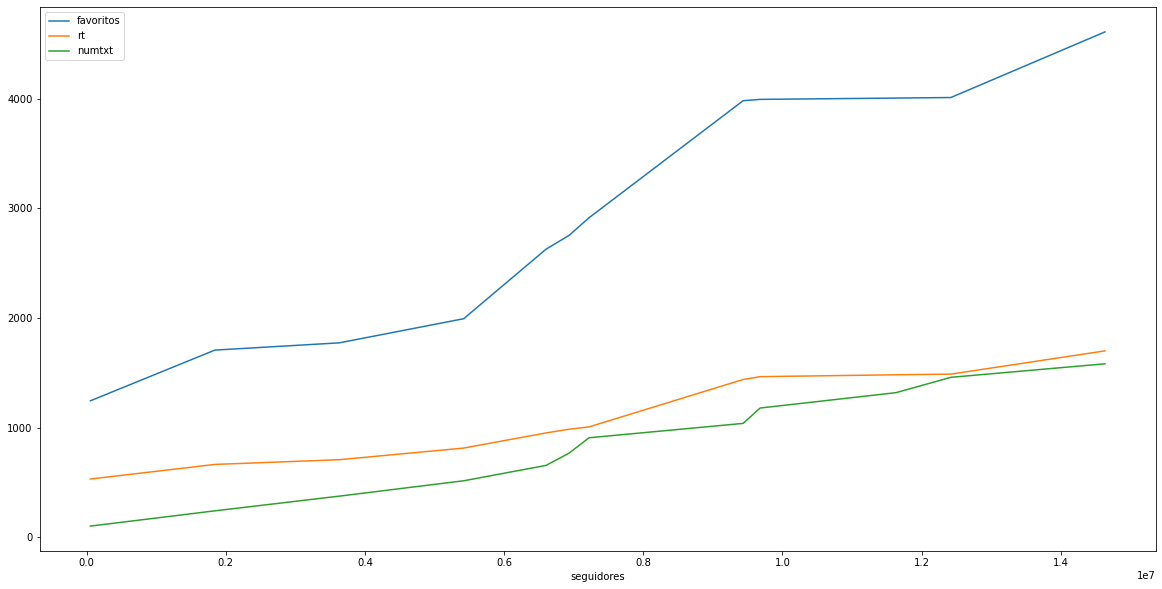

In [570]:
df1 = df.iloc[:, 2:7].cumsum()
df1.plot(x='seguidores', y=['favoritos','rt', 'numtxt'],figsize=(20,10))

# <center> Regresión Lineal<center>

In [571]:
#Sumamos el numero de seguidores + numero de rt y favoritos para obtener un solo punto 
df1["sum"] = df1[['favoritos','rt', 'numtxt']].sum(axis=1)
df2 = df1.iloc[:, [2,5]]
df2

,seguidores,sum
0,55860,1880
1,1843658,2614
2,3631456,2857
3,5419254,3323
4,6601421,4234
5,6934760,4507
6,7220321,4828
7,9434663,6458
8,9679358,6636
9,11630493,6805


In [572]:
x = list(df2.iloc [:, 0]) # seguidores
y = list(df2.iloc [:, 1]) # Total de la suma 

Z= 0.0004485857533154105 * 3740579 + 1569.679617226448 | Prediccion 3247.650065777253


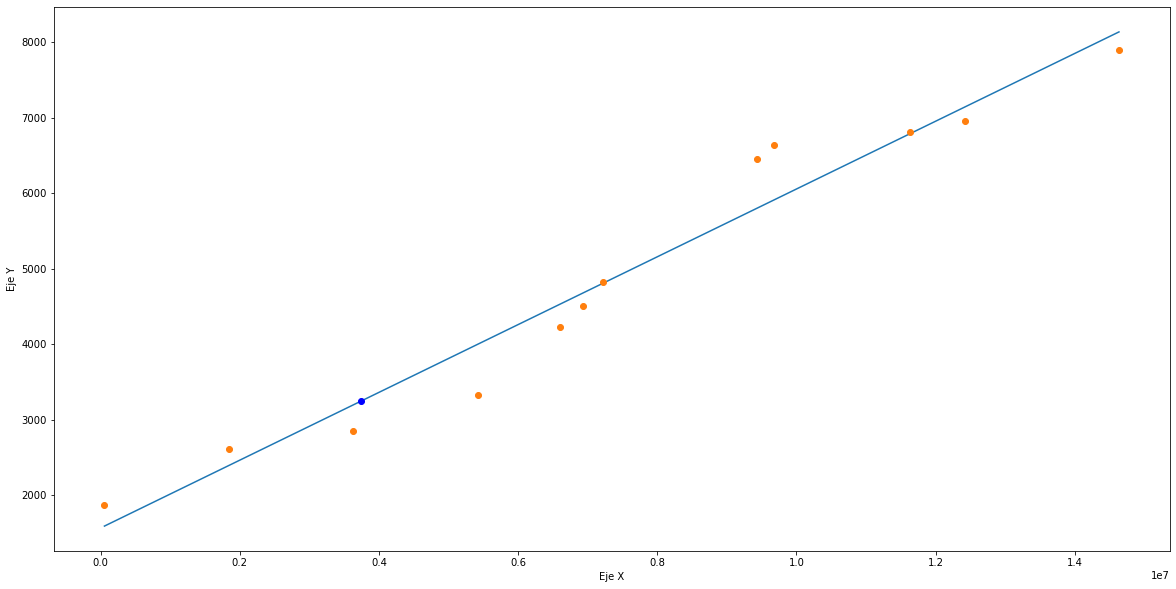

In [573]:
promedio = lambda a,y : sum(x) / len(y)
operacion1 = lambda x,y : sum((x-np.average(x))*(y-np.average(y)))/sum((x-np.average(x))*(x-np.average(x)))
operacion0 = lambda x,y : np.average(y)-operacion1(x,y)*np.average(x)

z = api.get_user('MashiRafael').followers_count

b1 =operacion1(x,y)
b0 =operacion0(x,y)
predecir= b1*z+b0
puntos_x = np.linspace(x[0],x[-1],6)
puntos_y = b0+b1*puntos_x
print('Z=',b1,'*',z,'+',b0, "| Prediccion",predecir)

plt.figure(figsize=(20,10))
plt.plot(puntos_x,puntos_y,)
plt.plot(x,y,"o") 
plt.plot(z,predecir,"o",color='blue') 
plt.xlabel('Eje X')
plt.ylabel('Eje Y')

plt.show()

# <center> Regresión Polinomial<center>

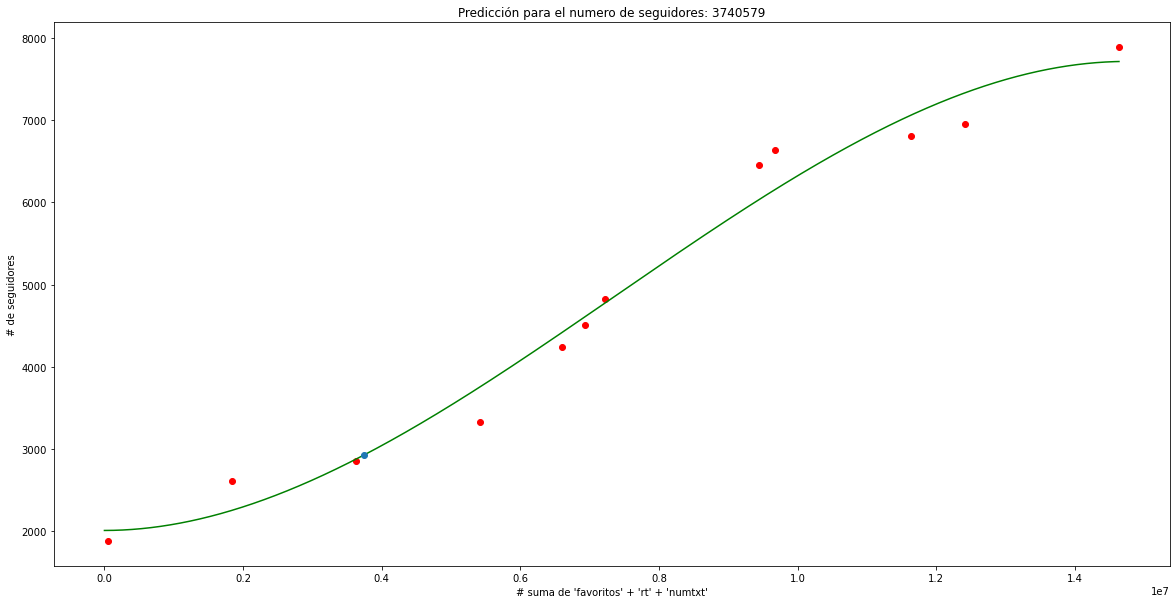

In [574]:
x = list(df2.iloc [:, 0]) # seguidores
y = list(df2.iloc [:, 1]) # Total de la suma
z = api.get_user('MashiRafael').followers_count

pf = PolynomialFeatures(degree = 4)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,max(x)+50))

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
respuesta =  round(-(prediccion_entrenamiento[z]))
plt.figure(figsize=(20,10))
plt.title('Predicción para el numero de seguidores: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='green')
plt.scatter(x,y,label="Datos Reales",color="red")
plt.xlabel("# suma de 'favoritos' + 'rt' + 'numtxt'")
plt.ylabel("# de seguidores")
plt.plot(z,prediccion_entrenamiento[z], 'o')
plt.show()

### <center> <span style="color:red">Eventos Discretos | Simpy</span></center> 

#### Elecciones de asambleístas del Azuay  
###### Se necesita 5 asambleístas. Pero en las presentes elecciones 90 aspirantes, Es decir existirán 18 partidos políticos.

In [ ]:
◦	Tomar los resultados de la regresión para la selección del candidato.
◦	Se tiene una tendencia del 90% de personas que realizan el proceso de elección dentro del Ecuador.
◦	Dentro del procesos se tiene que alrededor del 5% - 10% votan nulo.
◦	Solo se va a tener en cuanta las elecciones de los asambleístas por el Azuay.
◦	Las personas solo tiene un recinto electoral para realizar el proceso.
◦	Las personas solo pueden realizar un proceso de elección por asambleísta del Azuay.
◦	La persona se acerca a la mesa electoral y hacen fila en caso de ser necesario.
◦	Realiza el voto en un tiempo aleatorio de un partido especifico.
◦	La persona recibe su certificado votación.
◦	La persona sale del recinto electoral.
◦	Finalmente generar una grafica de las personas que votaron y los asambleístas electos.


In [1]:
import simpy
import random
import matplotlib.pyplot as pp
import math
import numpy as np

In [3]:
NUM_RECINTO = 1 #Esta variable no se esta usando ya que se pide analizar desde un solo mismo recinto

NUM_ASAMBLEISTAS = 5
NUM_CANDIDATOS = 90 
VOTOS = np.zeros(NUM_CANDIDATOS, dtype=int)
NUM_RECINTO = 1 # 
NUM_MENSAS = 3
T_LLEGADAS = 20
TIEMPO_SIMULACION = 120
NUM_VOTANTES = 1000 

TIEMPO_ESPERA  = 0.0 # tiempo de espera total
DURACION_TOTAL  = 0.0 # duracion de servicio total
FIN = 0.0 # minuto en el que finaliza

In [10]:
llegada = lambda persona, time : print ("---> ", persona," llego en minuto: ", time) #Imprime Llegada
salida = lambda persona, time : print ("<--- ", persona," Sale en minuto: ", time) #Imprime Salida
pasar_v = lambda persona, time, esp : print("<<>> ",persona, " pasa a vota en ", time, " minutos esperando", esp," <<>>") # timE
votacion = lambda persona, time : print(">>> ",persona, " vota en ", time, " minutos  <<<") #Imprime Votacion
carnet = lambda persona, time : print(">>> ",persona, " optiene carnet en ", time, " minutos  <<<") #Imprime Votacion
def votar(persona):
    global DURACION_TOTAL 
    tiempo_votar = random.randint(1,5)
    yield env.timeout(tiempo_votar)
    votacion(persona, tiempo_votar)
    DURACION_TOTAL = DURACION_TOTAL + tiempo_votar # suma total de tiempo
    # Asiganamos un voto aleatoria
    VOTOS[random.randint(0,NUM_CANDIDATOS-1)] = VOTOS[random.randint(0,NUM_CANDIDATOS-1)]  + 1
    yield env.process(carnetizacion(persona))

def carnetizacion(persona):
    global DURACION_TOTAL 
    tiempo_carnet = random.randint(1,3)
    yield env.timeout(tiempo_carnet)
    carnet(persona, tiempo_carnet)
    DURACION_TOTAL = DURACION_TOTAL + tiempo_carnet # suma total de tiempo
    # Asiganamos un voto aleatoria
    
def persona (env, name, mesas):
    global TIEMPO_ESPERA
    global FIN
    llega = env.now # minuto de llegada de persona
    llegada(name, llega)
    with mesas.request() as request: #Esperamos pasaar a mesas
        yield request # Obtiene turno
        pasa = env.now # Guarda el minuto cuado comienza a ser atendido
        espera = pasa - llega # Calcula el tiempo que espero
        TIEMPO_ESPERA = TIEMPO_ESPERA + espera # Acumula los tiempos de espera
        pasar_v(name, pasa, espera)
        yield env.process(votar(name)) # Invoca al de votar
        deja = env.now #Guarda el minuto en que termina el proceso votar 
        salida(name, deja)
        FIN = deja # Conserva globalmente el ultimo minuto de la simulacion


def elecciones(env, personal):
    llegada = 0
    for i in range(0,NUM_VOTANTES): # Para n clientes
        R = random.random()
        llegada = -T_LLEGADAS * math.log(R) # Distribucion exponencial
        yield env.timeout(llegada)  # Deja transcurrir un tiempo entre uno y otro
        i += 1
        env.process(persona(env, 'Persona %d' % i, personal)) 
        
print ("------------------- Simulacion Elecciones ------------------")
SEMILLA = 30
random.seed (SEMILLA)  # Cualquier valor
env = simpy.Environment() # Crea el objeto entorno de simulacion
personal = simpy.Resource(env, NUM_MENSAS) #Crea las mesas
env.process(elecciones(env, personal)) #Invoca el proceso princial
env.run() #Inicia la simulacion

------------------- Simulacion Elecciones ------------------
--->  Persona 1  llego en minuto:  12.357767874449124
<<>>  Persona 1  pasa a vota en  12.357767874449124  minutos esperando 0.0  <<>>
>>>  Persona 1  vota en  1  minutos  <<<
>>>  Persona 1  optiene carnet en  1  minutos  <<<
<---  Persona 1  Sale en minuto:  14.357767874449124
--->  Persona 2  llego en minuto:  37.17074959460619
<<>>  Persona 2  pasa a vota en  37.17074959460619  minutos esperando 0.0  <<>>
--->  Persona 3  llego en minuto:  37.63758317144609
<<>>  Persona 3  pasa a vota en  37.63758317144609  minutos esperando 0.0  <<>>
>>>  Persona 2  vota en  1  minutos  <<<
>>>  Persona 2  optiene carnet en  1  minutos  <<<
<---  Persona 2  Sale en minuto:  39.17074959460619
>>>  Persona 3  vota en  2  minutos  <<<
>>>  Persona 3  optiene carnet en  1  minutos  <<<
<---  Persona 3  Sale en minuto:  40.63758317144609
--->  Persona 4  llego en minuto:  56.10397758856335
<<>>  Persona 4  pasa a vota en  56.10397758856335  

<---  Persona 50  Sale en minuto:  1270.1176179069425
--->  Persona 51  llego en minuto:  1275.6210538542898
<<>>  Persona 51  pasa a vota en  1275.6210538542898  minutos esperando 0.0  <<>>
>>>  Persona 51  vota en  1  minutos  <<<
>>>  Persona 51  optiene carnet en  3  minutos  <<<
<---  Persona 51  Sale en minuto:  1279.6210538542898
--->  Persona 52  llego en minuto:  1310.5589425222888
<<>>  Persona 52  pasa a vota en  1310.5589425222888  minutos esperando 0.0  <<>>
--->  Persona 53  llego en minuto:  1311.3786577583217
<<>>  Persona 53  pasa a vota en  1311.3786577583217  minutos esperando 0.0  <<>>
--->  Persona 54  llego en minuto:  1312.589478693014
<<>>  Persona 54  pasa a vota en  1312.589478693014  minutos esperando 0.0  <<>>
>>>  Persona 53  vota en  2  minutos  <<<
>>>  Persona 52  vota en  5  minutos  <<<
>>>  Persona 53  optiene carnet en  3  minutos  <<<
<---  Persona 53  Sale en minuto:  1316.3786577583217
>>>  Persona 52  optiene carnet en  2  minutos  <<<
<---  Pers

>>>  Persona 105  vota en  2  minutos  <<<
>>>  Persona 105  optiene carnet en  2  minutos  <<<
<---  Persona 105  Sale en minuto:  2410.908575336521
--->  Persona 106  llego en minuto:  2420.3151833427073
<<>>  Persona 106  pasa a vota en  2420.3151833427073  minutos esperando 0.0  <<>>
>>>  Persona 106  vota en  3  minutos  <<<
>>>  Persona 106  optiene carnet en  1  minutos  <<<
<---  Persona 106  Sale en minuto:  2424.3151833427073
--->  Persona 107  llego en minuto:  2441.250084491039
<<>>  Persona 107  pasa a vota en  2441.250084491039  minutos esperando 0.0  <<>>
>>>  Persona 107  vota en  1  minutos  <<<
>>>  Persona 107  optiene carnet en  2  minutos  <<<
<---  Persona 107  Sale en minuto:  2444.250084491039
--->  Persona 108  llego en minuto:  2459.670216457477
<<>>  Persona 108  pasa a vota en  2459.670216457477  minutos esperando 0.0  <<>>
>>>  Persona 108  vota en  4  minutos  <<<
>>>  Persona 108  optiene carnet en  1  minutos  <<<
<---  Persona 108  Sale en minuto:  2464

<<>>  Persona 153  pasa a vota en  3141.442876656949  minutos esperando 0.0  <<>>
>>>  Persona 152  vota en  5  minutos  <<<
>>>  Persona 153  vota en  2  minutos  <<<
>>>  Persona 153  optiene carnet en  1  minutos  <<<
<---  Persona 153  Sale en minuto:  3144.442876656949
>>>  Persona 152  optiene carnet en  2  minutos  <<<
<---  Persona 152  Sale en minuto:  3145.14086458082
--->  Persona 154  llego en minuto:  3150.7694565387296
<<>>  Persona 154  pasa a vota en  3150.7694565387296  minutos esperando 0.0  <<>>
>>>  Persona 154  vota en  1  minutos  <<<
>>>  Persona 154  optiene carnet en  2  minutos  <<<
<---  Persona 154  Sale en minuto:  3153.7694565387296
--->  Persona 155  llego en minuto:  3239.682986716347
<<>>  Persona 155  pasa a vota en  3239.682986716347  minutos esperando 0.0  <<>>
>>>  Persona 155  vota en  5  minutos  <<<
>>>  Persona 155  optiene carnet en  1  minutos  <<<
<---  Persona 155  Sale en minuto:  3245.682986716347
--->  Persona 156  llego en minuto:  3272.

<<>>  Persona 216  pasa a vota en  4501.713302020504  minutos esperando 0.0  <<>>
>>>  Persona 216  vota en  5  minutos  <<<
>>>  Persona 216  optiene carnet en  1  minutos  <<<
<---  Persona 216  Sale en minuto:  4507.713302020504
--->  Persona 217  llego en minuto:  4518.105871937826
<<>>  Persona 217  pasa a vota en  4518.105871937826  minutos esperando 0.0  <<>>
--->  Persona 218  llego en minuto:  4518.21747208144
<<>>  Persona 218  pasa a vota en  4518.21747208144  minutos esperando 0.0  <<>>
>>>  Persona 217  vota en  1  minutos  <<<
>>>  Persona 218  vota en  2  minutos  <<<
>>>  Persona 218  optiene carnet en  1  minutos  <<<
<---  Persona 218  Sale en minuto:  4521.21747208144
>>>  Persona 217  optiene carnet en  3  minutos  <<<
<---  Persona 217  Sale en minuto:  4522.105871937826
--->  Persona 219  llego en minuto:  4561.438372546622
<<>>  Persona 219  pasa a vota en  4561.438372546622  minutos esperando 0.0  <<>>
>>>  Persona 219  vota en  2  minutos  <<<
>>>  Persona 219 

>>>  Persona 269  optiene carnet en  2  minutos  <<<
<---  Persona 269  Sale en minuto:  5661.326482602727
--->  Persona 270  llego en minuto:  5677.746060849836
<<>>  Persona 270  pasa a vota en  5677.746060849836  minutos esperando 0.0  <<>>
>>>  Persona 270  vota en  4  minutos  <<<
>>>  Persona 270  optiene carnet en  2  minutos  <<<
<---  Persona 270  Sale en minuto:  5683.746060849836
--->  Persona 271  llego en minuto:  5688.713207881441
<<>>  Persona 271  pasa a vota en  5688.713207881441  minutos esperando 0.0  <<>>
>>>  Persona 271  vota en  3  minutos  <<<
--->  Persona 272  llego en minuto:  5692.524258013165
<<>>  Persona 272  pasa a vota en  5692.524258013165  minutos esperando 0.0  <<>>
>>>  Persona 271  optiene carnet en  3  minutos  <<<
<---  Persona 271  Sale en minuto:  5694.713207881441
>>>  Persona 272  vota en  3  minutos  <<<
>>>  Persona 272  optiene carnet en  3  minutos  <<<
<---  Persona 272  Sale en minuto:  5698.524258013165
--->  Persona 273  llego en minu

<---  Persona 321  Sale en minuto:  6661.735827074769
--->  Persona 322  llego en minuto:  6713.620303669384
<<>>  Persona 322  pasa a vota en  6713.620303669384  minutos esperando 0.0  <<>>
>>>  Persona 322  vota en  4  minutos  <<<
>>>  Persona 322  optiene carnet en  3  minutos  <<<
<---  Persona 322  Sale en minuto:  6720.620303669384
--->  Persona 323  llego en minuto:  6739.2795885614705
<<>>  Persona 323  pasa a vota en  6739.2795885614705  minutos esperando 0.0  <<>>
>>>  Persona 323  vota en  4  minutos  <<<
>>>  Persona 323  optiene carnet en  2  minutos  <<<
<---  Persona 323  Sale en minuto:  6745.2795885614705
--->  Persona 324  llego en minuto:  6770.508835237762
<<>>  Persona 324  pasa a vota en  6770.508835237762  minutos esperando 0.0  <<>>
>>>  Persona 324  vota en  2  minutos  <<<
>>>  Persona 324  optiene carnet en  2  minutos  <<<
<---  Persona 324  Sale en minuto:  6774.508835237762
--->  Persona 325  llego en minuto:  6799.775829400337
<<>>  Persona 325  pasa a v

>>>  Persona 357  vota en  2  minutos  <<<
>>>  Persona 356  optiene carnet en  3  minutos  <<<
<---  Persona 356  Sale en minuto:  7279.551508028897
>>>  Persona 357  optiene carnet en  2  minutos  <<<
<---  Persona 357  Sale en minuto:  7280.278604859857
--->  Persona 358  llego en minuto:  7280.829297868742
<<>>  Persona 358  pasa a vota en  7280.829297868742  minutos esperando 0.0  <<>>
>>>  Persona 358  vota en  5  minutos  <<<
>>>  Persona 358  optiene carnet en  1  minutos  <<<
<---  Persona 358  Sale en minuto:  7286.829297868742
--->  Persona 359  llego en minuto:  7294.984080130918
<<>>  Persona 359  pasa a vota en  7294.984080130918  minutos esperando 0.0  <<>>
>>>  Persona 359  vota en  3  minutos  <<<
>>>  Persona 359  optiene carnet en  3  minutos  <<<
<---  Persona 359  Sale en minuto:  7300.984080130918
--->  Persona 360  llego en minuto:  7344.743350964853
<<>>  Persona 360  pasa a vota en  7344.743350964853  minutos esperando 0.0  <<>>
>>>  Persona 360  vota en  2  mi

>>>  Persona 411  vota en  2  minutos  <<<
--->  Persona 412  llego en minuto:  8583.664750703176
<<>>  Persona 412  pasa a vota en  8583.664750703176  minutos esperando 0.0  <<>>
>>>  Persona 411  optiene carnet en  2  minutos  <<<
<---  Persona 411  Sale en minuto:  8584.096376259453
>>>  Persona 412  vota en  2  minutos  <<<
>>>  Persona 412  optiene carnet en  2  minutos  <<<
<---  Persona 412  Sale en minuto:  8587.664750703176
--->  Persona 413  llego en minuto:  8599.589831345624
<<>>  Persona 413  pasa a vota en  8599.589831345624  minutos esperando 0.0  <<>>
>>>  Persona 413  vota en  2  minutos  <<<
>>>  Persona 413  optiene carnet en  1  minutos  <<<
<---  Persona 413  Sale en minuto:  8602.589831345624
--->  Persona 414  llego en minuto:  8612.360006762312
<<>>  Persona 414  pasa a vota en  8612.360006762312  minutos esperando 0.0  <<>>
>>>  Persona 414  vota en  4  minutos  <<<
>>>  Persona 414  optiene carnet en  3  minutos  <<<
<---  Persona 414  Sale en minuto:  8619.36

<<>>  Persona 460  pasa a vota en  9514.783367226339  minutos esperando 0.0  <<>>
>>>  Persona 460  vota en  2  minutos  <<<
>>>  Persona 460  optiene carnet en  1  minutos  <<<
<---  Persona 460  Sale en minuto:  9517.783367226339
--->  Persona 461  llego en minuto:  9528.280500218285
<<>>  Persona 461  pasa a vota en  9528.280500218285  minutos esperando 0.0  <<>>
>>>  Persona 461  vota en  3  minutos  <<<
>>>  Persona 461  optiene carnet en  3  minutos  <<<
<---  Persona 461  Sale en minuto:  9534.280500218285
--->  Persona 462  llego en minuto:  9538.305939982489
<<>>  Persona 462  pasa a vota en  9538.305939982489  minutos esperando 0.0  <<>>
>>>  Persona 462  vota en  1  minutos  <<<
>>>  Persona 462  optiene carnet en  3  minutos  <<<
<---  Persona 462  Sale en minuto:  9542.305939982489
--->  Persona 463  llego en minuto:  9553.37032654598
<<>>  Persona 463  pasa a vota en  9553.37032654598  minutos esperando 0.0  <<>>
>>>  Persona 463  vota en  4  minutos  <<<
>>>  Persona 463

<<>>  Persona 497  pasa a vota en  10237.560326174553  minutos esperando 0.0  <<>>
>>>  Persona 497  vota en  4  minutos  <<<
>>>  Persona 497  optiene carnet en  3  minutos  <<<
<---  Persona 497  Sale en minuto:  10244.560326174553
--->  Persona 498  llego en minuto:  10245.68245829054
<<>>  Persona 498  pasa a vota en  10245.68245829054  minutos esperando 0.0  <<>>
>>>  Persona 498  vota en  4  minutos  <<<
>>>  Persona 498  optiene carnet en  3  minutos  <<<
<---  Persona 498  Sale en minuto:  10252.68245829054
--->  Persona 499  llego en minuto:  10268.99530921014
<<>>  Persona 499  pasa a vota en  10268.99530921014  minutos esperando 0.0  <<>>
>>>  Persona 499  vota en  2  minutos  <<<
--->  Persona 500  llego en minuto:  10272.321871970355
<<>>  Persona 500  pasa a vota en  10272.321871970355  minutos esperando 0.0  <<>>
>>>  Persona 499  optiene carnet en  2  minutos  <<<
<---  Persona 499  Sale en minuto:  10272.99530921014
>>>  Persona 500  vota en  5  minutos  <<<
>>>  Perso

<<>>  Persona 533  pasa a vota en  10853.484273480173  minutos esperando 0.0  <<>>
--->  Persona 534  llego en minuto:  10857.372215573074
<<>>  Persona 534  pasa a vota en  10857.372215573074  minutos esperando 0.0  <<>>
>>>  Persona 533  vota en  4  minutos  <<<
>>>  Persona 534  vota en  3  minutos  <<<
>>>  Persona 533  optiene carnet en  3  minutos  <<<
<---  Persona 533  Sale en minuto:  10860.484273480173
>>>  Persona 534  optiene carnet en  1  minutos  <<<
<---  Persona 534  Sale en minuto:  10861.372215573074
--->  Persona 535  llego en minuto:  10880.989368901677
<<>>  Persona 535  pasa a vota en  10880.989368901677  minutos esperando 0.0  <<>>
>>>  Persona 535  vota en  1  minutos  <<<
>>>  Persona 535  optiene carnet en  3  minutos  <<<
<---  Persona 535  Sale en minuto:  10884.989368901677
--->  Persona 536  llego en minuto:  10889.618358866186
<<>>  Persona 536  pasa a vota en  10889.618358866186  minutos esperando 0.0  <<>>
>>>  Persona 536  vota en  5  minutos  <<<
>>> 

>>>  Persona 580  optiene carnet en  1  minutos  <<<
<---  Persona 580  Sale en minuto:  11687.206710036728
--->  Persona 581  llego en minuto:  11753.307960004553
<<>>  Persona 581  pasa a vota en  11753.307960004553  minutos esperando 0.0  <<>>
>>>  Persona 581  vota en  1  minutos  <<<
>>>  Persona 581  optiene carnet en  1  minutos  <<<
<---  Persona 581  Sale en minuto:  11755.307960004553
--->  Persona 582  llego en minuto:  11782.887541956452
<<>>  Persona 582  pasa a vota en  11782.887541956452  minutos esperando 0.0  <<>>
>>>  Persona 582  vota en  3  minutos  <<<
>>>  Persona 582  optiene carnet en  2  minutos  <<<
<---  Persona 582  Sale en minuto:  11787.887541956452
--->  Persona 583  llego en minuto:  11788.22446730143
<<>>  Persona 583  pasa a vota en  11788.22446730143  minutos esperando 0.0  <<>>
>>>  Persona 583  vota en  2  minutos  <<<
--->  Persona 584  llego en minuto:  11791.002420966093
<<>>  Persona 584  pasa a vota en  11791.002420966093  minutos esperando 0.0

>>>  Persona 615  vota en  3  minutos  <<<
>>>  Persona 615  optiene carnet en  1  minutos  <<<
<---  Persona 615  Sale en minuto:  12380.604692501824
--->  Persona 616  llego en minuto:  12401.197623722943
<<>>  Persona 616  pasa a vota en  12401.197623722943  minutos esperando 0.0  <<>>
>>>  Persona 616  vota en  5  minutos  <<<
>>>  Persona 616  optiene carnet en  1  minutos  <<<
<---  Persona 616  Sale en minuto:  12407.197623722943
--->  Persona 617  llego en minuto:  12433.719464340142
<<>>  Persona 617  pasa a vota en  12433.719464340142  minutos esperando 0.0  <<>>
>>>  Persona 617  vota en  1  minutos  <<<
>>>  Persona 617  optiene carnet en  2  minutos  <<<
<---  Persona 617  Sale en minuto:  12436.719464340142
--->  Persona 618  llego en minuto:  12535.144750963651
<<>>  Persona 618  pasa a vota en  12535.144750963651  minutos esperando 0.0  <<>>
>>>  Persona 618  vota en  3  minutos  <<<
>>>  Persona 618  optiene carnet en  2  minutos  <<<
<---  Persona 618  Sale en minuto:

--->  Persona 663  llego en minuto:  13360.165986970354
<<>>  Persona 663  pasa a vota en  13360.165986970354  minutos esperando 0.0  <<>>
>>>  Persona 663  vota en  1  minutos  <<<
>>>  Persona 663  optiene carnet en  2  minutos  <<<
<---  Persona 663  Sale en minuto:  13363.165986970354
--->  Persona 664  llego en minuto:  13429.314935385437
<<>>  Persona 664  pasa a vota en  13429.314935385437  minutos esperando 0.0  <<>>
>>>  Persona 664  vota en  1  minutos  <<<
--->  Persona 665  llego en minuto:  13431.537342231808
<<>>  Persona 665  pasa a vota en  13431.537342231808  minutos esperando 0.0  <<>>
>>>  Persona 664  optiene carnet en  2  minutos  <<<
<---  Persona 664  Sale en minuto:  13432.314935385437
>>>  Persona 665  vota en  2  minutos  <<<
>>>  Persona 665  optiene carnet en  3  minutos  <<<
<---  Persona 665  Sale en minuto:  13436.537342231808
--->  Persona 666  llego en minuto:  13446.1872261766
<<>>  Persona 666  pasa a vota en  13446.1872261766  minutos esperando 0.0  

--->  Persona 717  llego en minuto:  14494.211477664432
<<>>  Persona 717  pasa a vota en  14494.211477664432  minutos esperando 0.0  <<>>
>>>  Persona 717  vota en  4  minutos  <<<
--->  Persona 718  llego en minuto:  14498.754940294486
<<>>  Persona 718  pasa a vota en  14498.754940294486  minutos esperando 0.0  <<>>
>>>  Persona 717  optiene carnet en  2  minutos  <<<
<---  Persona 717  Sale en minuto:  14500.211477664432
>>>  Persona 718  vota en  3  minutos  <<<
>>>  Persona 718  optiene carnet en  1  minutos  <<<
<---  Persona 718  Sale en minuto:  14502.754940294486
--->  Persona 719  llego en minuto:  14504.126564455955
<<>>  Persona 719  pasa a vota en  14504.126564455955  minutos esperando 0.0  <<>>
>>>  Persona 719  vota en  1  minutos  <<<
>>>  Persona 719  optiene carnet en  1  minutos  <<<
<---  Persona 719  Sale en minuto:  14506.126564455955
--->  Persona 720  llego en minuto:  14527.256014810113
<<>>  Persona 720  pasa a vota en  14527.256014810113  minutos esperando 0

--->  Persona 757  llego en minuto:  15450.135232436163
<<>>  Persona 757  pasa a vota en  15450.135232436163  minutos esperando 0.0  <<>>
>>>  Persona 757  vota en  2  minutos  <<<
>>>  Persona 757  optiene carnet en  3  minutos  <<<
<---  Persona 757  Sale en minuto:  15455.135232436163
--->  Persona 758  llego en minuto:  15485.572110211233
<<>>  Persona 758  pasa a vota en  15485.572110211233  minutos esperando 0.0  <<>>
>>>  Persona 758  vota en  3  minutos  <<<
>>>  Persona 758  optiene carnet en  3  minutos  <<<
<---  Persona 758  Sale en minuto:  15491.572110211233
--->  Persona 759  llego en minuto:  15528.083067634398
<<>>  Persona 759  pasa a vota en  15528.083067634398  minutos esperando 0.0  <<>>
>>>  Persona 759  vota en  1  minutos  <<<
>>>  Persona 759  optiene carnet en  3  minutos  <<<
<---  Persona 759  Sale en minuto:  15532.083067634398
--->  Persona 760  llego en minuto:  15537.285522741906
<<>>  Persona 760  pasa a vota en  15537.285522741906  minutos esperando 0

--->  Persona 797  llego en minuto:  16155.245133091415
<<>>  Persona 797  pasa a vota en  16155.245133091415  minutos esperando 0.0  <<>>
>>>  Persona 797  vota en  4  minutos  <<<
>>>  Persona 797  optiene carnet en  2  minutos  <<<
<---  Persona 797  Sale en minuto:  16161.245133091415
--->  Persona 798  llego en minuto:  16161.44890285275
<<>>  Persona 798  pasa a vota en  16161.44890285275  minutos esperando 0.0  <<>>
>>>  Persona 798  vota en  3  minutos  <<<
>>>  Persona 798  optiene carnet en  3  minutos  <<<
<---  Persona 798  Sale en minuto:  16167.44890285275
--->  Persona 799  llego en minuto:  16170.379539207896
<<>>  Persona 799  pasa a vota en  16170.379539207896  minutos esperando 0.0  <<>>
>>>  Persona 799  vota en  4  minutos  <<<
>>>  Persona 799  optiene carnet en  2  minutos  <<<
<---  Persona 799  Sale en minuto:  16176.379539207896
--->  Persona 800  llego en minuto:  16178.29134226022
<<>>  Persona 800  pasa a vota en  16178.29134226022  minutos esperando 0.0  <

<---  Persona 836  Sale en minuto:  16705.20354256023
--->  Persona 837  llego en minuto:  16734.8637715243
<<>>  Persona 837  pasa a vota en  16734.8637715243  minutos esperando 0.0  <<>>
>>>  Persona 837  vota en  4  minutos  <<<
>>>  Persona 837  optiene carnet en  3  minutos  <<<
<---  Persona 837  Sale en minuto:  16741.8637715243
--->  Persona 838  llego en minuto:  16754.532887492136
<<>>  Persona 838  pasa a vota en  16754.532887492136  minutos esperando 0.0  <<>>
>>>  Persona 838  vota en  3  minutos  <<<
>>>  Persona 838  optiene carnet en  2  minutos  <<<
<---  Persona 838  Sale en minuto:  16759.532887492136
--->  Persona 839  llego en minuto:  16762.444373105645
<<>>  Persona 839  pasa a vota en  16762.444373105645  minutos esperando 0.0  <<>>
--->  Persona 840  llego en minuto:  16763.88136792037
<<>>  Persona 840  pasa a vota en  16763.88136792037  minutos esperando 0.0  <<>>
>>>  Persona 840  vota en  2  minutos  <<<
>>>  Persona 839  vota en  4  minutos  <<<
>>>  Perso

>>>  Persona 871  optiene carnet en  1  minutos  <<<
<---  Persona 871  Sale en minuto:  17647.21167750999
--->  Persona 872  llego en minuto:  17648.891613473545
<<>>  Persona 872  pasa a vota en  17648.891613473545  minutos esperando 0.0  <<>>
>>>  Persona 872  vota en  2  minutos  <<<
>>>  Persona 872  optiene carnet en  3  minutos  <<<
<---  Persona 872  Sale en minuto:  17653.891613473545
--->  Persona 873  llego en minuto:  17683.713784735253
<<>>  Persona 873  pasa a vota en  17683.713784735253  minutos esperando 0.0  <<>>
>>>  Persona 873  vota en  1  minutos  <<<
>>>  Persona 873  optiene carnet en  1  minutos  <<<
<---  Persona 873  Sale en minuto:  17685.713784735253
--->  Persona 874  llego en minuto:  17699.87671854754
<<>>  Persona 874  pasa a vota en  17699.87671854754  minutos esperando 0.0  <<>>
>>>  Persona 874  vota en  3  minutos  <<<
>>>  Persona 874  optiene carnet en  1  minutos  <<<
<---  Persona 874  Sale en minuto:  17703.87671854754
--->  Persona 875  llego e

<<>>  Persona 909  pasa a vota en  18312.843870656357  minutos esperando 0.0  <<>>
>>>  Persona 907  vota en  4  minutos  <<<
--->  Persona 910  llego en minuto:  18314.485280799276
>>>  Persona 908  vota en  2  minutos  <<<
>>>  Persona 907  optiene carnet en  3  minutos  <<<
<---  Persona 907  Sale en minuto:  18316.35728962658
<<>>  Persona 910  pasa a vota en  18316.35728962658  minutos esperando 1.8720088273039437  <<>>
>>>  Persona 908  optiene carnet en  2  minutos  <<<
<---  Persona 908  Sale en minuto:  18316.824094737847
>>>  Persona 909  vota en  4  minutos  <<<
>>>  Persona 910  vota en  1  minutos  <<<
>>>  Persona 910  optiene carnet en  2  minutos  <<<
<---  Persona 910  Sale en minuto:  18319.35728962658
>>>  Persona 909  optiene carnet en  3  minutos  <<<
<---  Persona 909  Sale en minuto:  18319.843870656357
--->  Persona 911  llego en minuto:  18341.84438923119
<<>>  Persona 911  pasa a vota en  18341.84438923119  minutos esperando 0.0  <<>>
>>>  Persona 911  vota en

--->  Persona 944  llego en minuto:  19015.516934163086
<<>>  Persona 944  pasa a vota en  19015.516934163086  minutos esperando 0.0  <<>>
>>>  Persona 944  vota en  4  minutos  <<<
>>>  Persona 944  optiene carnet en  1  minutos  <<<
<---  Persona 944  Sale en minuto:  19020.516934163086
--->  Persona 945  llego en minuto:  19045.574492024614
<<>>  Persona 945  pasa a vota en  19045.574492024614  minutos esperando 0.0  <<>>
>>>  Persona 945  vota en  1  minutos  <<<
>>>  Persona 945  optiene carnet en  2  minutos  <<<
<---  Persona 945  Sale en minuto:  19048.574492024614
--->  Persona 946  llego en minuto:  19064.29601929754
<<>>  Persona 946  pasa a vota en  19064.29601929754  minutos esperando 0.0  <<>>
>>>  Persona 946  vota en  1  minutos  <<<
>>>  Persona 946  optiene carnet en  2  minutos  <<<
<---  Persona 946  Sale en minuto:  19067.29601929754
--->  Persona 947  llego en minuto:  19087.669335660932
<<>>  Persona 947  pasa a vota en  19087.669335660932  minutos esperando 0.0 

>>>  Persona 972  optiene carnet en  2  minutos  <<<
<---  Persona 972  Sale en minuto:  19756.700731527828
--->  Persona 973  llego en minuto:  19797.742295839023
<<>>  Persona 973  pasa a vota en  19797.742295839023  minutos esperando 0.0  <<>>
--->  Persona 974  llego en minuto:  19800.403981858643
<<>>  Persona 974  pasa a vota en  19800.403981858643  minutos esperando 0.0  <<>>
--->  Persona 975  llego en minuto:  19801.520690043366
<<>>  Persona 975  pasa a vota en  19801.520690043366  minutos esperando 0.0  <<>>
>>>  Persona 973  vota en  5  minutos  <<<
>>>  Persona 975  vota en  3  minutos  <<<
>>>  Persona 974  vota en  5  minutos  <<<
>>>  Persona 973  optiene carnet en  3  minutos  <<<
<---  Persona 973  Sale en minuto:  19805.742295839023
>>>  Persona 975  optiene carnet en  2  minutos  <<<
<---  Persona 975  Sale en minuto:  19806.520690043366
--->  Persona 976  llego en minuto:  19807.80441407343
<<>>  Persona 976  pasa a vota en  19807.80441407343  minutos esperando 0.0

In [6]:
VOTOS

array([14, 11, 11,  9, 12, 11,  9, 10, 10, 11,  9, 12, 10, 12, 12,  8,  9,
        9, 13, 16, 15, 12, 12, 13, 11,  8, 10, 11,  8, 18, 10, 10, 10,  9,
       12, 11, 17, 11, 13,  8, 11, 12, 11,  6,  9,  9, 11,  5,  7, 11, 13,
       10, 12, 16, 11, 19, 10, 11,  9, 16,  8, 18,  9, 13, 10,  6, 10, 12,
       12,  9, 10, 11, 14, 10,  9, 15, 12,  8, 12, 10, 10, 17,  5, 11, 11,
       12, 15, 10,  8,  9])